In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import random


In [2]:
# Fetch data for a specific S&P 500 stock
stock_ticker = 'AAPL'  # Example stock (Apple)
data = yf.download(stock_ticker, start="2022-01-01", end="2023-01-01")
data['Returns'] = data['Adj Close'].pct_change()

# Drop NaN returns
data = data.dropna()
print(data.head())



[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-04  182.630005  182.940002  179.119995  179.699997  176.803802   
2022-01-05  179.610001  180.169998  174.639999  174.919998  172.100830   
2022-01-06  172.699997  175.300003  171.639999  172.000000  169.227951   
2022-01-07  172.889999  174.139999  171.029999  172.169998  169.395187   
2022-01-10  169.080002  172.500000  168.169998  172.190002  169.414856   

               Volume   Returns  
Date                             
2022-01-04   99310400 -0.012692  
2022-01-05   94537600 -0.026600  
2022-01-06   96904000 -0.016693  
2022-01-07   86709100  0.000988  
2022-01-10  106765600  0.000116  


In [3]:
class Trader:
    def __init__(self, id, cash, stocks):
        self.id = id
        self.cash = cash
        self.stocks = stocks

    def decide_action(self, stock_price):
        action = random.choice(['buy', 'sell', 'hold'])
        quantity = random.randint(1, 10)  # Random trade size
        return action, quantity

class MarketMaker:
    def __init__(self, spread):
        self.spread = spread

    def provide_liquidity(self, stock_price):
        bid = stock_price * (1 - self.spread / 2)
        ask = stock_price * (1 + self.spread / 2)
        return bid, ask


In [4]:
# Initialize traders
num_traders = 50
traders = [Trader(id=i, cash=10000, stocks=10) for i in range(num_traders)]

# Initialize market maker
market_maker = MarketMaker(spread=0.02)

# Set initial stock price
stock_price = data['Adj Close'].iloc[0]


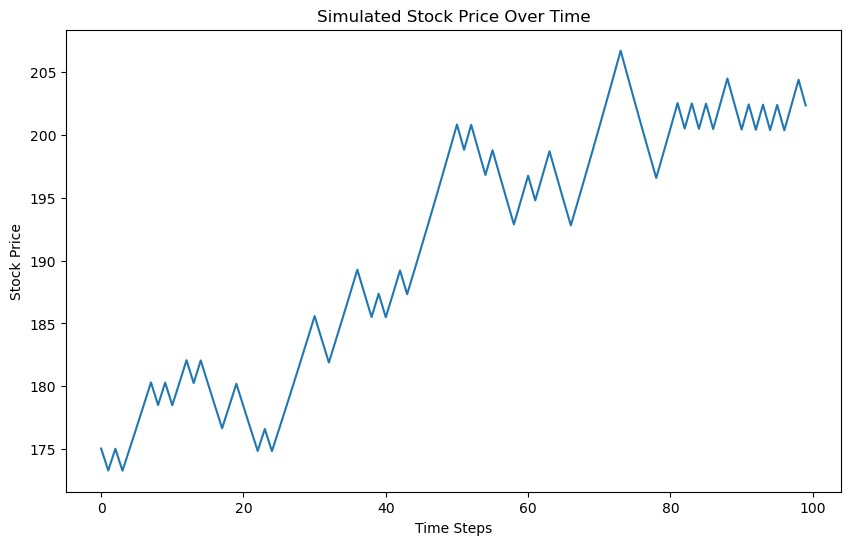

In [5]:
def simulate_market(traders, market_maker, stock_price, num_steps=100):
    prices = []
    for step in range(num_steps):
        bid, ask = market_maker.provide_liquidity(stock_price)
        for trader in traders:
            action, quantity = trader.decide_action(stock_price)
            if action == 'buy' and trader.cash >= ask * quantity:
                stock_price = ask  # Buyer impacts price
                trader.cash -= ask * quantity
                trader.stocks += quantity
            elif action == 'sell' and trader.stocks >= quantity:
                stock_price = bid  # Seller impacts price
                trader.cash += bid * quantity
                trader.stocks -= quantity
        prices.append(stock_price)
    return prices

# Run simulation
prices = simulate_market(traders, market_maker, stock_price)

# Plot price movement
plt.figure(figsize=(10, 6))
plt.plot(prices)
plt.title("Simulated Stock Price Over Time")
plt.xlabel("Time Steps")
plt.ylabel("Stock Price")
plt.show()


In [7]:
def analyze_liquidity(prices):
    returns = np.diff(prices) / prices[:-1]
    volatility = np.std(returns)
    liquidity_metric = 1 / volatility  # Higher is better
    return liquidity_metric

liquidity_metric = analyze_liquidity(prices)
print("Market Liquidity Metric:", liquidity_metric)


Market Liquidity Metric: 101.1679910150193
